# PLN (Procesamiento del lenguaje natural) con Python
  
**Requisitos: Será necesario instalar la librería NLTK, además de descargar el corpus para las stopwords. Por defecto Conda incluye el paquete NLTK así como Google Colab.  En el caso de que no estuviera instalado NLTK, ejecutar el siguiente chunk**

In [1]:
# Ejecutar este chunk sólo si no está instalado NLTK
# Descomentar la siguiente línea para instalar la libraría:

#!conda install nltk 

In [2]:
import nltk

In [3]:
# nltk.download_shell() 
# #d) DOwnload:
# #stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


## Obtener los datos

Para el presente ejercicio, usaremos un dataset de [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).  Este dataset está en la carpeta **data**.  El conjunto de datos está en inglés y cuenta con más de 5000 SMS.  Para información ampliada sobre el conjunto de datos, consultar el fichero **readme**.

Comprobamos primero el total de mensajes del conjunto de datos.  Usaremos rstrip() para eliminar 'espacios' al final de cada línea (o retornos de carro):

In [4]:
mensajes = [line.rstrip() for line in open('datos/SMSSpamCollection')]
print(len(mensajes))

5574


In [5]:
type (mensajes)

list

In [6]:
mensajes [0:20]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cl

Una colección de textos se suele denominar "corpus". Podemos imprimir mensajes, mostrando además el número de SMS, usando **enumerate**:

In [7]:
for num_mensaje, mensajes in enumerate(mensajes[:20]):
    print(num_mensaje, mensajes)
    #print('\n')


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

El set de datos, tiene como separador \t (es un TSV), donde la primera columna nos indica si el mensaje es spam o no.  La segunda columna contiene el cuerpo del SMS.

A través de Machine Learning, vamos a entrenar un modelo para aprender a discriminar automáticamente cuando un SMS es span o no.  El modelo lo podremos usar para clasificar SMS sin la variable clase.

Podemos ver el proceso seguido, a través de la documentación oficial de SciKit Learn:

<img src='https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_1.png' width=600/>

In [8]:
import pandas as pd

In [9]:
mensajes = pd.read_csv('datos/SMSSpamCollection', sep='\t',
                           names=["clase", "mensajes"])
mensajes.head()

,clase,mensajes
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Análisis exploratorio inicial

In [10]:
mensajes.describe()

,clase,mensajes
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Agrupamos los datos en base a la clase y vemos que devuelve describe().

In [11]:
mensajes.groupby('clase').describe()

mensajes                                                               
         count unique                                                top freq
clase                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

Para continuar, realizamos un análisis exploratorio para conocer los datos con los que estamos trabajando.  Cuanto mayor sea el conocimiento que tengamos de los datos, mayor capacidad tendremos para  el [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering) (ingeniería de datos o factores).

El enriquecimiento de los datos, puede ser mejorar de manera reseñable la capacidad predictiva de nuestro modelo, frente a un set de datos dado.

In [12]:
mensajes['tamaño'] = mensajes['mensajes'].apply(len)
mensajes.head()

,clase,mensajes,tamaño
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
mensajes.sort_values('tamaño', ascending=False)

,clase,mensajes,tamaño
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
...,...,...,...
3376,ham,:),3
5357,ham,Ok,2
4498,ham,Ok,2
1925,ham,Ok,2


### Visualización de los datos.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

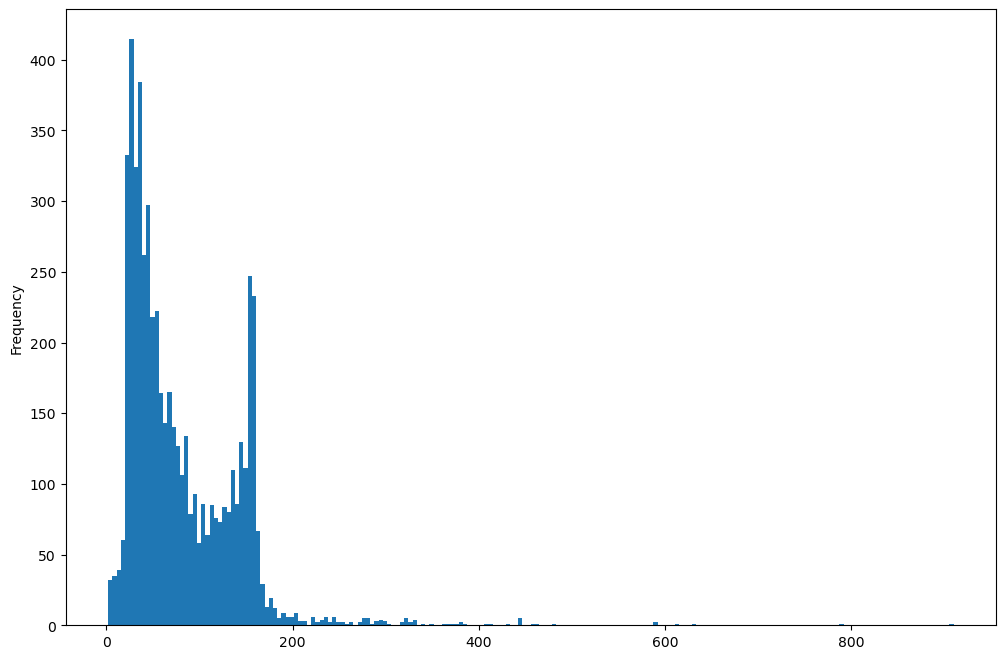

In [15]:
plt.figure(figsize=(12,8))
mensajes['tamaño'].plot(bins=200, kind='hist') 

<AxesSubplot:ylabel='Frequency'>

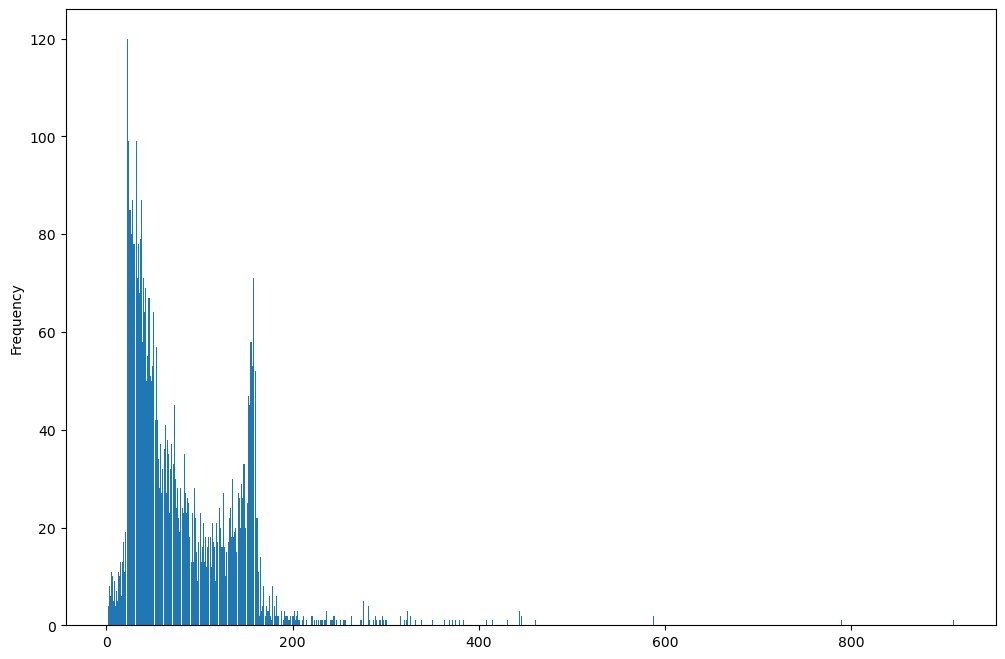

In [16]:
plt.figure(figsize=(12,8))
mensajes['tamaño'].plot.hist(bins=1000) 

Podemos jugar con el argumento bin que nos permite definir la granularidad o resolución del eje X.  Para estos datos bins representa la longitud de los mensajes ¿Qué pasa cuando bins se acerca a 1000?  Tenemos registros (mensajes)

In [17]:
mensajes.sort_values('tamaño', ascending=False)

,clase,mensajes,tamaño
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
...,...,...,...
3376,ham,:),3
5357,ham,Ok,2
4498,ham,Ok,2
1925,ham,Ok,2


Buscamenos el mensaje más extenso con 910 caracteres.

In [18]:
mensajes[mensajes['tamaño'] == 910]['mensajes'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Olvidándonos del contenido del mensaje, nos centramos en la idea que ver si la longitud del mensaje influye en si es spam o no.

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

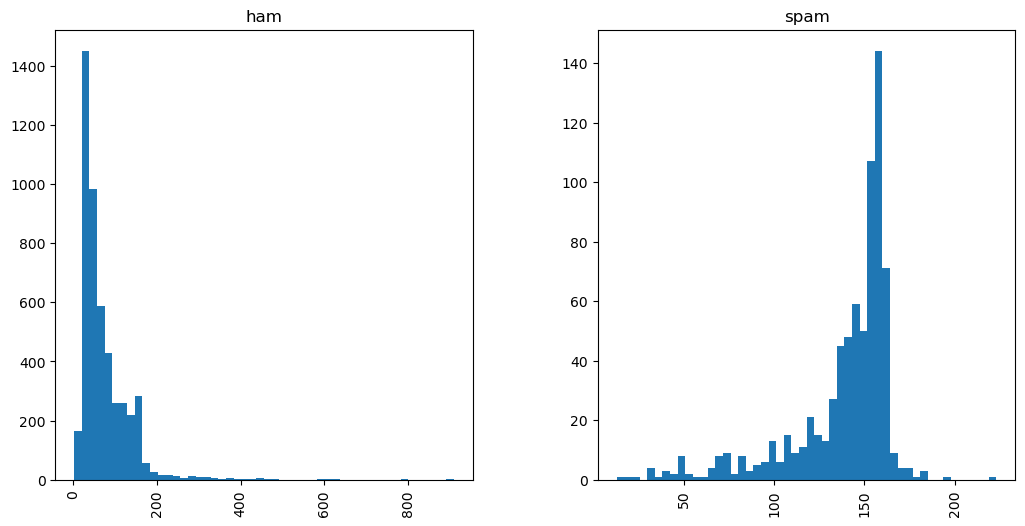

In [19]:
mensajes.hist(column='tamaño', by='clase', bins=50,figsize=(12,6))

A través del análisis exploratorio inicial, hemos obtenido una conclusión interesante, la tendencia a que un mensaje sea considerado spam aumenta con el tamaño del mensaje.

## Preprocesado del texto

Los algoritmos de clasificación, implican convertir la conversión del set de datos en algún tipo de dataframe numérico (conversión del corpus a formato vector).  La manera más sencilla es a través de una aproximación del tipo [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) donde una palabra se representa por un número.

Convertiremos por tanto mensajes en bruto (estado actual) en vectores (secuencias de números).

Como primer paso separaremos a través de una funcion, cada mensaje en una lista de palabras.  Posteriormente eliminaremos las palabras muy comunes (stopwords como 'the', 'a', ...) a través de la librería NLTK (https://www.nltk.org/book/).  En este caso de uso usaremos las funciones básicas de la librería.

Stopwords: https://es.wikipedia.org/wiki/Palabra_vac%C3%ADa

Generamos una función que procese un mensaje y posteriormente a través de **apply()** lo procesaremos para todo el DataFrame.

Eliminamos los signos de puntuación, para ello podemos usar el método **string**:

In [20]:
import string

mens = 'Ejemplo mensaje! Atención: tiene un punto..'

# Comprobamos los caracteres para ver si son símbolos de puntuación
nopunc = [char for char in mens if char not in string.punctuation]

nopunc

['E',
 'j',
 'e',
 'm',
 'p',
 'l',
 'o',
 ' ',
 'm',
 'e',
 'n',
 's',
 'a',
 'j',
 'e',
 ' ',
 'A',
 't',
 'e',
 'n',
 'c',
 'i',
 'ó',
 'n',
 ' ',
 't',
 'i',
 'e',
 'n',
 'e',
 ' ',
 'u',
 'n',
 ' ',
 'p',
 'u',
 'n',
 't',
 'o']

In [21]:
string.punctuation #elimina todo lo que sean puntuaciones

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# Juntamos los caracteres de nuevo para construir una cadena de texto.
nopunc = ''.join(nopunc)
nopunc

'Ejemplo mensaje Atención tiene un punto'

In [23]:
mens

'Ejemplo mensaje! Atención: tiene un punto..'

Una vez eliminados los signos de puntuación, eliminamos las stopwords.  En este ejemplo, el set de datos está en inglés, por lo que deberemos eliminar las stopwords inglesas. En la documentación de NLTF podemos encontrar las stopwords para cada idioma.

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mydoctor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Las StopWords para castellano son:

In [26]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [27]:
nopunc.split()

['Ejemplo', 'mensaje', 'Atención', 'tiene', 'un', 'punto']

In [28]:
# Eliminamos stopwords
clean_mens = [word for word in nopunc.split() if word.lower() not in stopwords.words('spanish')]

In [29]:
clean_mens

['Ejemplo', 'mensaje', 'Atención', 'punto']

In [30]:
# Otra manera de hacer lo mismo
clean_mens2 = []
for word in nopunc.split():
    if word.lower() not in stopwords.words('spanish'):
        clean_mens2.append (word)

In [31]:
clean_mens2

['Ejemplo', 'mensaje', 'Atención', 'punto']

Este ejemplo está desarrollado para texto en castellano, pero el conjunto de datos está en inglés.  Automatizamos el proceso para ejecutarlo sobre el total de datos en inglés.

In [32]:
def procesado_texto(mens):
    """
    Acepta una cadena de texto, y ejecuta:
    1. Elimina todos los símbolos de puntuación
    2. Elimina las stopwords
    3. Devuelve una lista de texto limpio
    """
    # Comprobar caracteres para eliminar cualquier símbolo de puntuación
    nopunc = [char for char in mens if char not in string.punctuation]

    # Unir los caracteres para generar un string de nuevo.
    nopunc = ''.join(nopunc)
    
    # Eliminar las stopwords (en este caso de uso, inglesas)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
mensajes.head()

,clase,mensajes,tamaño
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Para procesar el set de datos, necesitamos 'tokenizar' los mensajes (convertir un conjunto de textos, en una lista de 'tokens' que son las palabras que nos interesan).

Let's see an example output on on column:

**Atención:**
Podemos obtener 'warnings' debido a símbolos que no hemos tenido en cuenta o que no están en Unicode (como el símbolo de € o libra)

In [34]:
# Comprobamos que funciona
mensajes['mensajes'].head(10).apply(procesado_texto)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: mensajes, dtype: object

In [35]:
mensajes.head()

,clase,mensajes,tamaño
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Continuando con la Normalización

Existen diferentes maneras para continuar normalizando textos.  Una de ellas es el [Stemming](https://es.wikipedia.org/wiki/Stemming) otra de ellas podría ser la caracterización de cada palabra en función de si es un sustantivo, adjetivo, verbo, ...(http://www.nltk.org/book/ch05.html).

NLTK tiene numerosas herramientas (que están muy bien documentadas).  Tenemos que tener en cuenta, que en ocasiones el formato de las palabras y textos pueden estár abreviados o no están correctamente construidas a nivel sintáctico.  Por ejemplo:
    
_'Nah dawg, IDK! Wut time u headin to da club?'_
    
vs.

_'No dog, I don't know! What time are you heading to the club?'_
    
Para esos casos será necesario hacer uso de los métodos avanzados disponibles en [NLTK book online](http://www.nltk.org/book/).


## Vectorización

Hasta ahora, tenemos los mensajes como una lista de tokens (también conocidas como [lemas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) y tenemos que convertir esos mensajes en un vector que los algoritmos de SciKit learn puedan usar.

Convertiremos ahora cada mensaje (representado como una lista de tokens (lemas)), en un vector.  
Pasos:
1. Contar cuántas veces aparece cada palabra en cada mensaje (frecuencia):

2. Ponderar las apariciones, de manera que los tokens frecuentes 'pesen' menos (inversa de la frecuencia)

3. Normalizar los vectores


El resultado que queremos obtener es una matriz de este tipo:

<table border = “1“>
<tr>
<th></th> <th>Mensaje 1</th> <th>Mensaje 2</th> <th>...</th> <th>Mensaje N</th> 
</tr>
<tr>
<td><b>Palabra 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Palabra 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Palabra N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


En esta matriz, representamos por filas todos los tokens (únicos) detectados y por columnas cada uno de los mensajes del conjunto de datos.  Haremos uso de **CountVectorizer** incluido en Scikit Learn.

Debido a que no todas los tokens aparecerán en todos los mensajes, obtendremos una "matriz dispersa" donde el valor más habitual es el 0 -> [Matriz dispersa](https://en.wikipedia.org/wiki/Sparse_matrix).

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

Hay muchos argumentos y parámetros que se pueden pasar al CountVectorizer. En este caso sólo especificaremos que el **analizador** sea nuestra propia función previamente definida.

In [37]:
# Éste proceso puede llevar un tiempo...
nube_palabras = CountVectorizer(analyzer = procesado_texto).fit(mensajes['mensajes'])

# Total elementos en la nube de palabras
print(len(nube_palabras.vocabulary_))

11425


In [38]:
# Una pequeña muestra de lo obtenido
pd.Series(nube_palabras.vocabulary_)[1:50]

jurong                 7555
point                  8917
crazy                  5769
Available              1110
bugis                  5218
n                      8336
great                  6937
world                 11163
la                     7668
e                      6217
buffet                 5217
Cine                   1483
got                    6906
amore                  4653
wat                   10965
Ok                     3064
lar                    7701
Joking                 2451
wif                   11072
u                     10698
oni                    8590
Free                   1941
entry                  6331
2                       423
wkly                  11123
comp                   5619
win                   11084
FA                     1833
Cup                    1551
final                  6557
tkts                  10512
21st                    443
May                    2804
2005                    430
Text                   3953
87121               

Extraemos la nube de palabras de un mensaje como vector...

In [39]:
mensaje4 = mensajes['mensajes'][3]
print(mensaje4)

U dun say so early hor... U c already then say...


En formato vector tendríamos...

In [40]:
vector4 = nube_palabras.transform([mensaje4])
print(vector4)
print('\n')
print('Dimensiones: ',vector4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


Dimensiones:  (1, 11425)


Vemos que en el mensaje4, hay 7 palabras únicas (tras eliminar las stop words).  2 de ellas aparece dos veces, y el resto sólo una vez.  Comprobamos a qué términos corresponden éstos elementos.

In [41]:
print(nube_palabras.get_feature_names_out()[4068])
print(nube_palabras.get_feature_names_out()[9554])

U
say


Ahora usaremos **.transform** en la nube de palabras obtenida y la convertimos en DataFrame

In [42]:
mensajes_nube_palabras = nube_palabras.transform(mensajes['mensajes'])

In [43]:
print('Dimensiones de la matriz dispersa: ', mensajes_nube_palabras.shape)
print('Total de elementos NO nulos: ', mensajes_nube_palabras.nnz)

Dimensiones de la matriz dispersa:  (5572, 11425)
Total de elementos NO nulos:  50548


In [44]:
dispersion = (100.0 * mensajes_nube_palabras.nnz / (mensajes_nube_palabras.shape[0] * mensajes_nube_palabras.shape[1]))
print('dispersion: {}'.format(dispersion))

dispersion: 0.07940295412668218


Después de obtener la matriz con la nube de palabras, necesitamos normalizar lo obtenido.  El objetivo es comprobar cómo de importante es cada término respecto del total y puede llevarse a cabo a través de [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), usando `TfidfTransformer` de Scikit-learn.

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(mensajes_nube_palabras)
tfidf4 = tfidf_transformer.transform(vector4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


¿Cuál es el IDF (inverse document frequency) para las palabras "u" y "university"?

In [46]:
print(tfidf_transformer.idf_[nube_palabras.vocabulary_['u']])
print(tfidf_transformer.idf_[nube_palabras.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Transformamos la nube de palabras en un corpus TD-IDF de una vez:

In [47]:
mensajes_tfidf = tfidf_transformer.transform(mensajes_nube_palabras)
print(mensajes_tfidf.shape)

(5572, 11425)


In [48]:
print(mensajes_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

## Entrenando el modelo

Puesto que ya tenemos los mensajes reprentados como vectores, podemos entrenar nuestro clasificador spam/ham. Podemos utilizar casi cualquier tipo de algoritmo de clasificación.  Usaremos para este caso el clasificador Naive Bajes (http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf).

[Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [49]:
from sklearn.naive_bayes import MultinomialNB
modelo_deteccion_spam = MultinomialNB().fit(mensajes_tfidf, mensajes['clase'])

Ya tenemos el modelo, veamos cómo clasifica el mensaje 4:

In [50]:
print('Predicho:', modelo_deteccion_spam.predict(tfidf4)[0])
print('Esperado:', mensajes.clase[3])

Predicho: ham
Esperado: ham


Ya tenemos nuestro modelo clasificador de mensajes.

## Evaluación del modelo
Comprobaremos ahora el desempeño de nuestro modelo con la predicción de todos los mensajes. Tenemos que tener en cuenta que no podemos usar el mismo set de datos para entrenar y testear el modelo.  Puesto que no hemos particionado los datos al inicio, no podríamos comprobar el desempeño del modelo.

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, clase_train, clase_test = train_test_split(mensajes['mensajes'], mensajes['clase'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


Hemos elegido en este caso un tamaño de la muestra de test del 20% (1115 mensajes de un total de 5572).

## Creación de un Pipeline

El Pipeline es el código común que generará un modelo para cualquier problema de clasificación o regresión.  También generan códigos para entrenamiento y prueba , transforma datos. [Pipeline](http://scikit-learn.org/stable/modules/pipeline.html)

La salida de todo el proceso es un objeto modelo, que es persistente, se puede guardar y cargar para su análisis.


In [52]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('nube', CountVectorizer(analyzer=procesado_texto)),  # convertir las cadenas de texto en tokens
    ('tfidf', TfidfTransformer()),  # recuento de repeticiones a puntuación TF-IDF ponderada.
    ('clasificador', MultinomialNB()),  # entrenamiento multinomial NaiveBayes
])

'Pasamos' ahora los mensajes de texto y pipeline realizará el preprocesamiento por nosotros:

In [53]:
pipeline.fit(msg_train,clase_train)

Pipeline(steps=[('nube',
                 CountVectorizer(analyzer=<function procesado_texto at 0x7f1f53ed3a60>)),
                ('tfidf', TfidfTransformer()),
                ('clasificador', MultinomialNB())])

In [54]:
from sklearn.metrics import classification_report
predicciones = pipeline.predict(msg_test)

In [55]:
print(classification_report(clase_test,predicciones))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       952
        spam       1.00      0.75      0.86       163

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.96      0.96      0.96      1115



Si quisiéramos usar otro clasificador, es muy sencillo a través de pipeline.  En el siguiente ejemplo usaremos el clasficador RF

In [57]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('nube', CountVectorizer(analyzer=procesado_texto)), 
    ('tfidf', TfidfTransformer()),  
    ('clasficador', RandomForestClassifier()),  
])

¿Puedes comprobar el desempeño del clasificador RF? ¿Es mejor o peor que el de NB?

## Más recursos

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)